<a href="https://colab.research.google.com/github/dwivediparas777/MNIST/blob/master/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [0]:
# Libraries for Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Immporting libraries for basic calculation
import numpy as np

# Importing deep learing library
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import backend as K

# Importing other library
import time
from __future__ import print_function

Using TensorFlow backend.


In [0]:
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

## Load MNIST dataset with the data shuffled between train and test sets

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Model Genration 6 Concolution layer with kernel 3X3 

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 838s 14ms/step - loss: 0.3071 - acc: 0.9050 - val_loss: 0.0482 - val_acc: 0.9853
Epoch 2/12
60000/60000 [==============================] - 837s 14ms/step - loss: 0.0918 - acc: 0.9729 - val_loss: 0.0378 - val_acc: 0.9885
Epoch 3/12
60000/60000 [==============================] - 834s 14ms/step - loss: 0.0672 - acc: 0.9805 - val_loss: 0.0335 - val_acc: 0.9887
Epoch 4/12
60000/60000 [==============================] - 837s 14ms/step - loss: 0.0476 - acc: 0.9858 - val_loss: 0.0246 - val_acc: 0.9922
Epoch 6/12
60000/60000 [==============================] - 830s 14ms/step - loss: 0.0427 - acc: 0.9880 - val_loss: 0.0212 - val_acc: 0.9924
Epoch 7/12
60000/60000 [==============================] - 833s 14ms/step - loss: 0.0389 - acc: 0.9887 - val_loss: 0.0232 - val_acc: 0.9927
Epoch 8/12
60000/60000 [==============================] - 827s 14ms/step - loss: 0.0372 - acc: 0.9896 - val_loss: 0.

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 20, 20, 64)        73792     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 18, 18, 32)        18464     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
__________

Test score: 0.021047636220705317
Test accuracy: 0.993


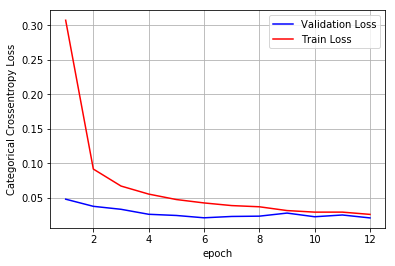

In [0]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,12+1))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)    

## Model Genration 6 Concolution layer with kernel 5X5

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 15s 243us/step - loss: 0.3125 - acc: 0.9086 - val_loss: 0.0750 - val_acc: 0.9787
Epoch 2/12
60000/60000 [==============================] - 10s 168us/step - loss: 0.1018 - acc: 0.9743 - val_loss: 0.0607 - val_acc: 0.9830
Epoch 3/12
60000/60000 [==============================] - 10s 167us/step - loss: 0.0684 - acc: 0.9824 - val_loss: 0.0397 - val_acc: 0.9890
Epoch 4/12
60000/60000 [==============================] - 10s 167us/step - loss: 0.0538 - acc: 0.9857 - val_loss: 0.0429 - val_acc: 0.9881
Epoch 5/12
60000/60000 [==============================] - 10s 168us/step - loss: 0.0458 - acc: 0.9888 - val_loss: 0.0327 - val_acc: 0.9916
Epoch 6/12
60000/600

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 20, 20, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)        204864    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 32)          51232     
__________

Test score: 0.03106973443276179
Test accuracy: 0.9939


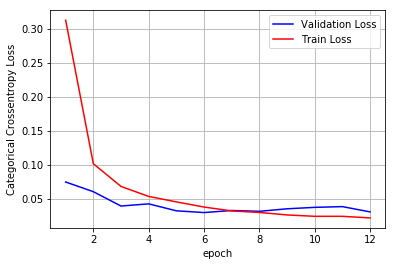

In [0]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,12+1))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)    

## Model Genration 6 Concolution layer with kernel 3X3-> 3X3 -> 5X5 -> 5X5 ->7X7 ->7X7

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape, padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (7, 7), activation='relu', padding='same'))
model.add(Conv2D(128, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 16s 265us/step - loss: 0.1752 - acc: 0.9501 - val_loss: 0.2375 - val_acc: 0.9356
Epoch 2/12
60000/60000 [==============================] - 14s 238us/step - loss: 0.0523 - acc: 0.9849 - val_loss: 0.0433 - val_acc: 0.9871
Epoch 3/12
60000/60000 [==============================] - 15s 243us/step - loss: 0.0361 - acc: 0.9902 - val_loss: 0.0254 - val_acc: 0.9932
Epoch 4/12
60000/60000 [==============================] - 15s 247us/step - loss: 0.0287 - acc: 0.9927 - val_loss: 0.0283 - val_acc: 0.9918
Epoch 5/12
60000/60000 [==============================] - 15s 248us/step - loss: 0.0209 - acc: 0.9941 - val_loss: 0.0235 - val_acc: 0.9944
Epoch 6/12
60000/60000 [==============================] - 15s 245us/step - loss: 0.0195 - acc: 0.9946 - val_loss: 0.0258 - val_acc: 0.9934
Epoch 7/12
60000/60000 [==============================] - 15s 242us/step - loss: 0.0164 - acc: 0.9956 - val_loss: 0.

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 14, 14, 64)        102464    
_________________________________________________________________
batch_normalization_10 (Batc (None, 14, 14, 64)        256       
__________

Test score: 0.02907799239689043
Test accuracy: 0.994


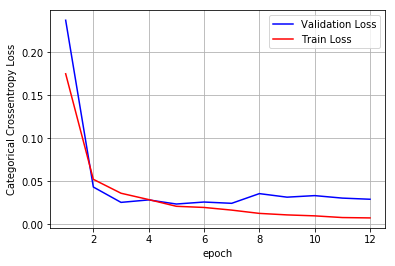

In [0]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,12+1))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)    

# Conclusion

In [0]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
x= PrettyTable()
x.field_names= ["No of Convolution Layers", "Kernel size", 'Test score', 'Test accuracy']
x.add_row([6, '3X3',0.021047636220705317,.993 ])
x.add_row([6, '5X5', 0.03106973443276179, 0.9939])
x.add_row([6, '3X3-> 3X3 -> 5X5 -> 5X5 ->7X7 ->7X7',0.02907799239689043,0.994])
print(x)

+--------------------------+-------------------------------------+----------------------+---------------+
| No of Convolution Layers |             Kernel size             |      Test score      | Test accuracy |
+--------------------------+-------------------------------------+----------------------+---------------+
|            6             |                 3X3                 | 0.021047636220705317 |     0.993     |
|            6             |                 5X5                 | 0.03106973443276179  |     0.9939    |
|            6             | 3X3-> 3X3 -> 5X5 -> 5X5 ->7X7 ->7X7 | 0.02907799239689043  |     0.994     |
+--------------------------+-------------------------------------+----------------------+---------------+
